In [10]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

In [11]:
# Saving the training data in a dataframe.
DF = pd.read_csv('train_data.csv')
DF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
"""
Getting Training info like total number of entries,
non-null count, datatype of each feature
"""
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Dropping the Loan_ID column, as it is not useful for building model.
DF.drop('Loan_ID', axis=1, inplace=True)

In [14]:
# Getting the total number of null values in each columns.
DF.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Getting the description (min, max, mean, median, Q1, Q3, std) of numeric columns.
DF.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
# Imputing null values.

# Imputing categorical columns with most frequent(mode) values.
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
imputer_cat = SimpleImputer(strategy='most_frequent')
DF[categorical_columns] = imputer_cat.fit_transform(DF[categorical_columns])

"""
Imputing numerical columns with median.
As there may be outliars in the dataset,
the best choice will be median over mean.
"""
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer_num = SimpleImputer(strategy='median')
DF[numerical_columns] = imputer_num.fit_transform(DF[numerical_columns])

In [18]:
# Storing the categorical and numeric column names in a list.
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

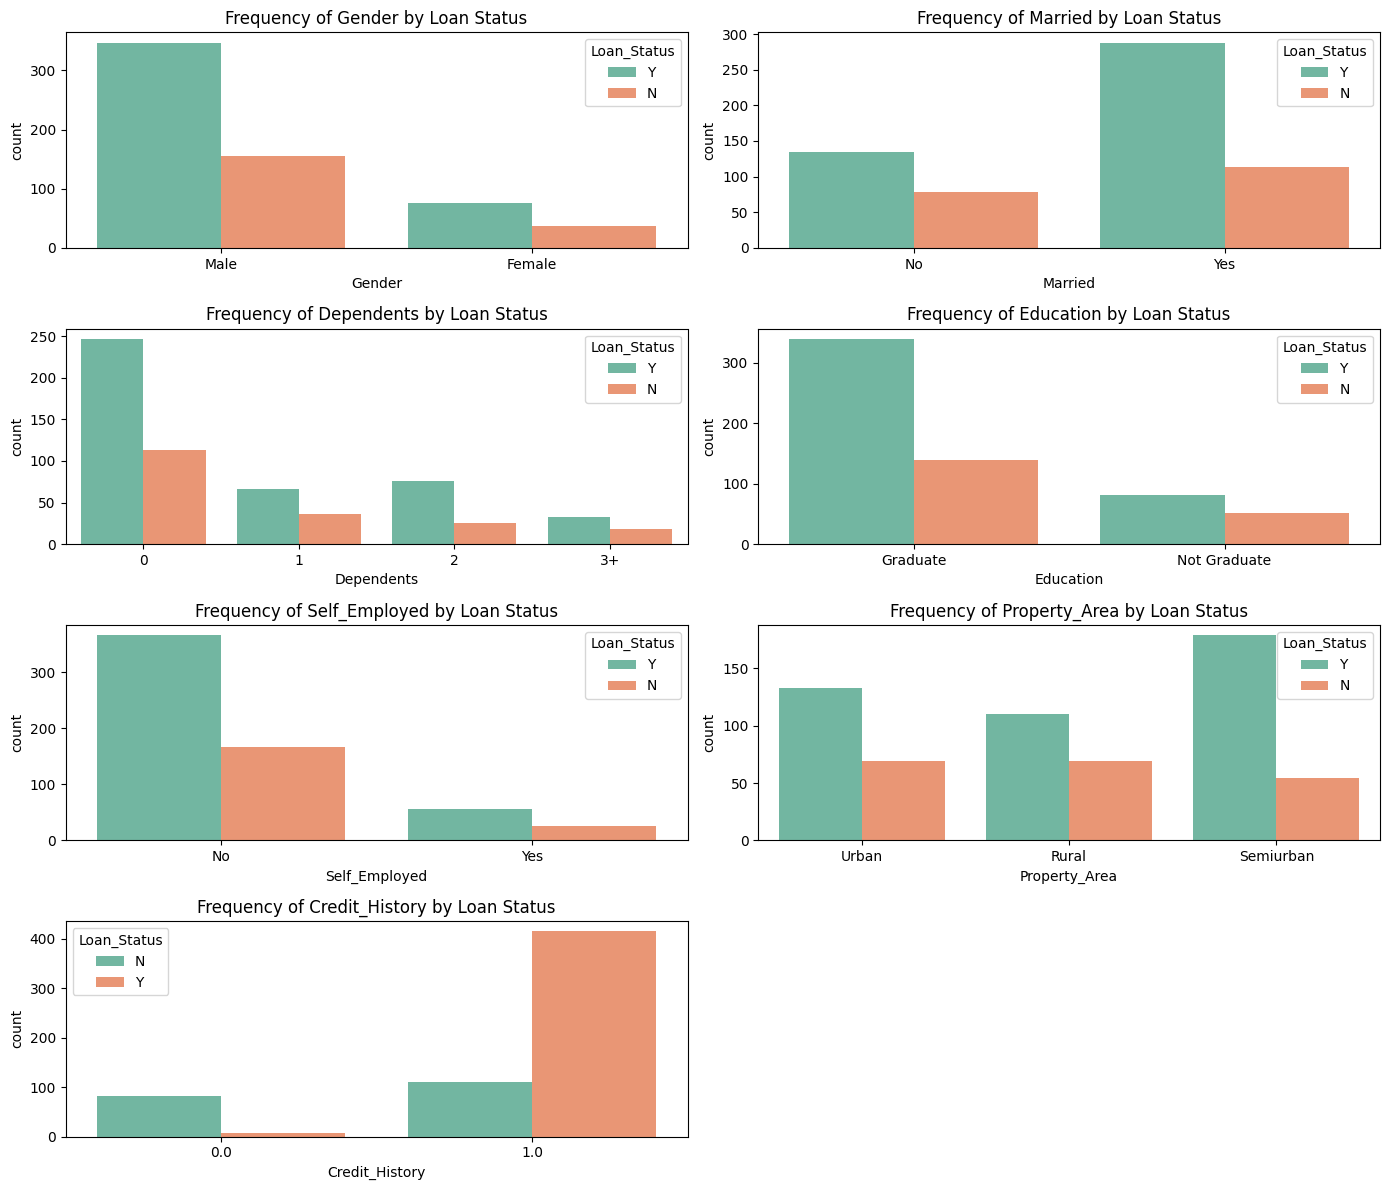

In [19]:
# Plotting Bar Plots of categorical columns.
plt.figure(figsize=(14, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2 + len(cat_cols) % 2, 2, i+1)
    sns.countplot(data=DF, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'Frequency of {col} by Loan Status')
    plt.tight_layout()

plt.savefig('categorical_barplots.png')
plt.show()

C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

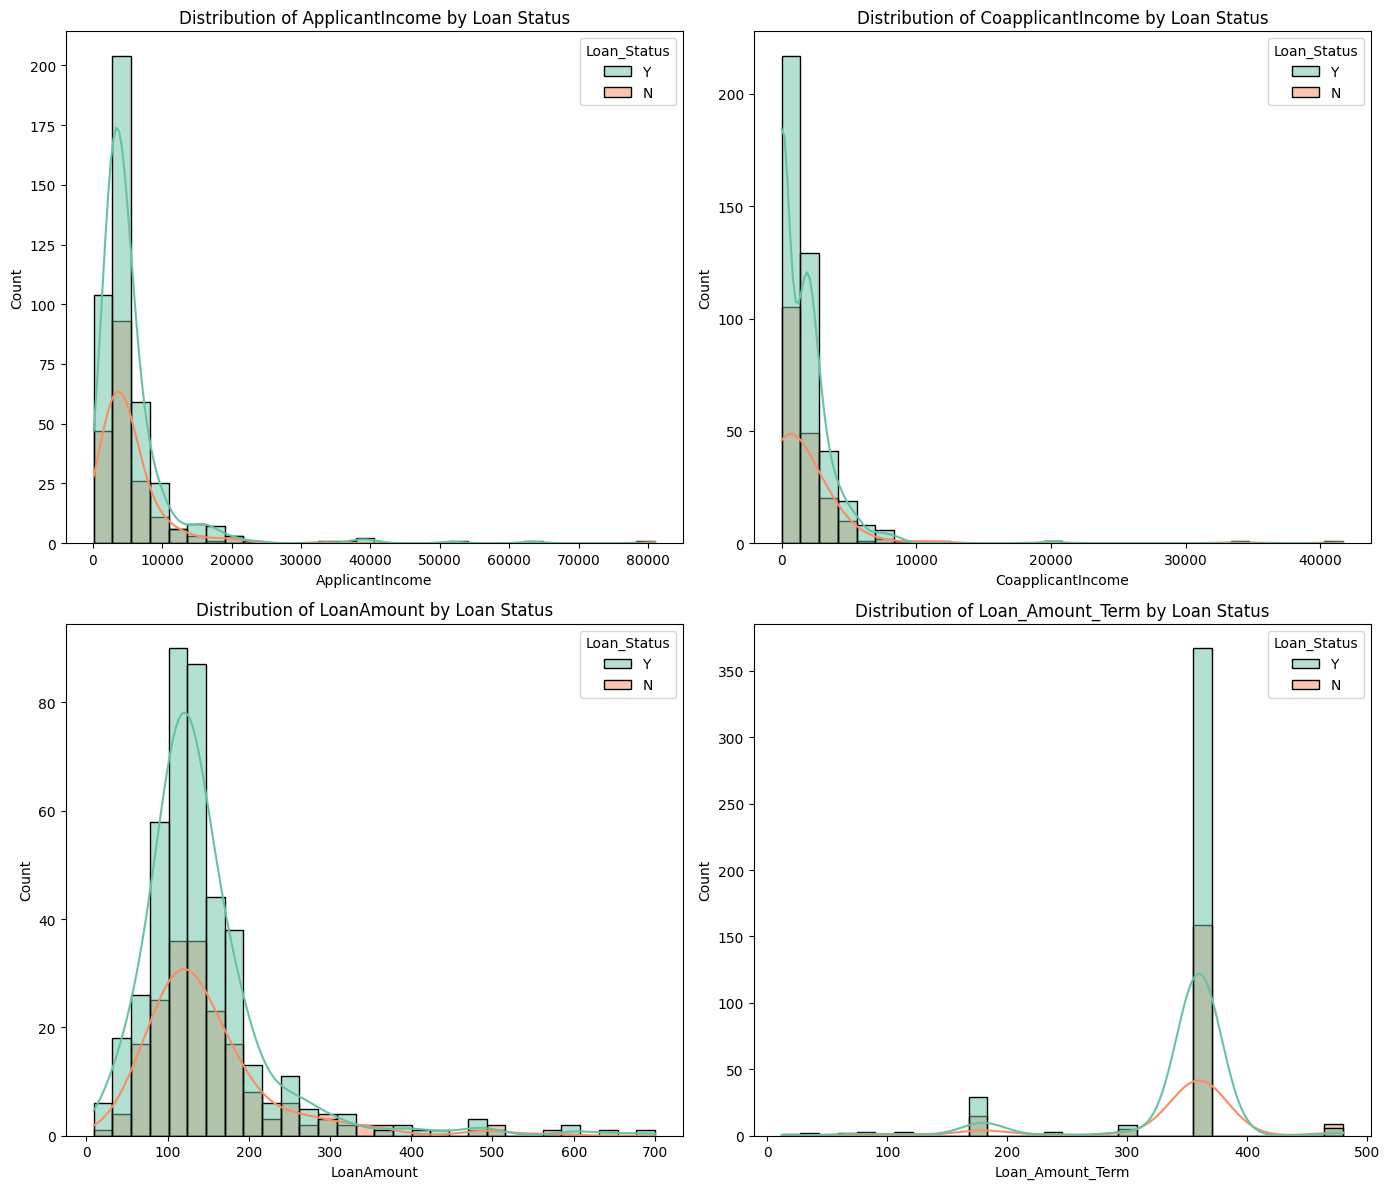

In [20]:
# Plotting Histograms of numeric columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + len(num_cols) % 2, 2, i+1)
    sns.histplot(DF, x=col, hue='Loan_Status', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.tight_layout()

plt.savefig('numerical_histograms.png')
plt.show()

C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

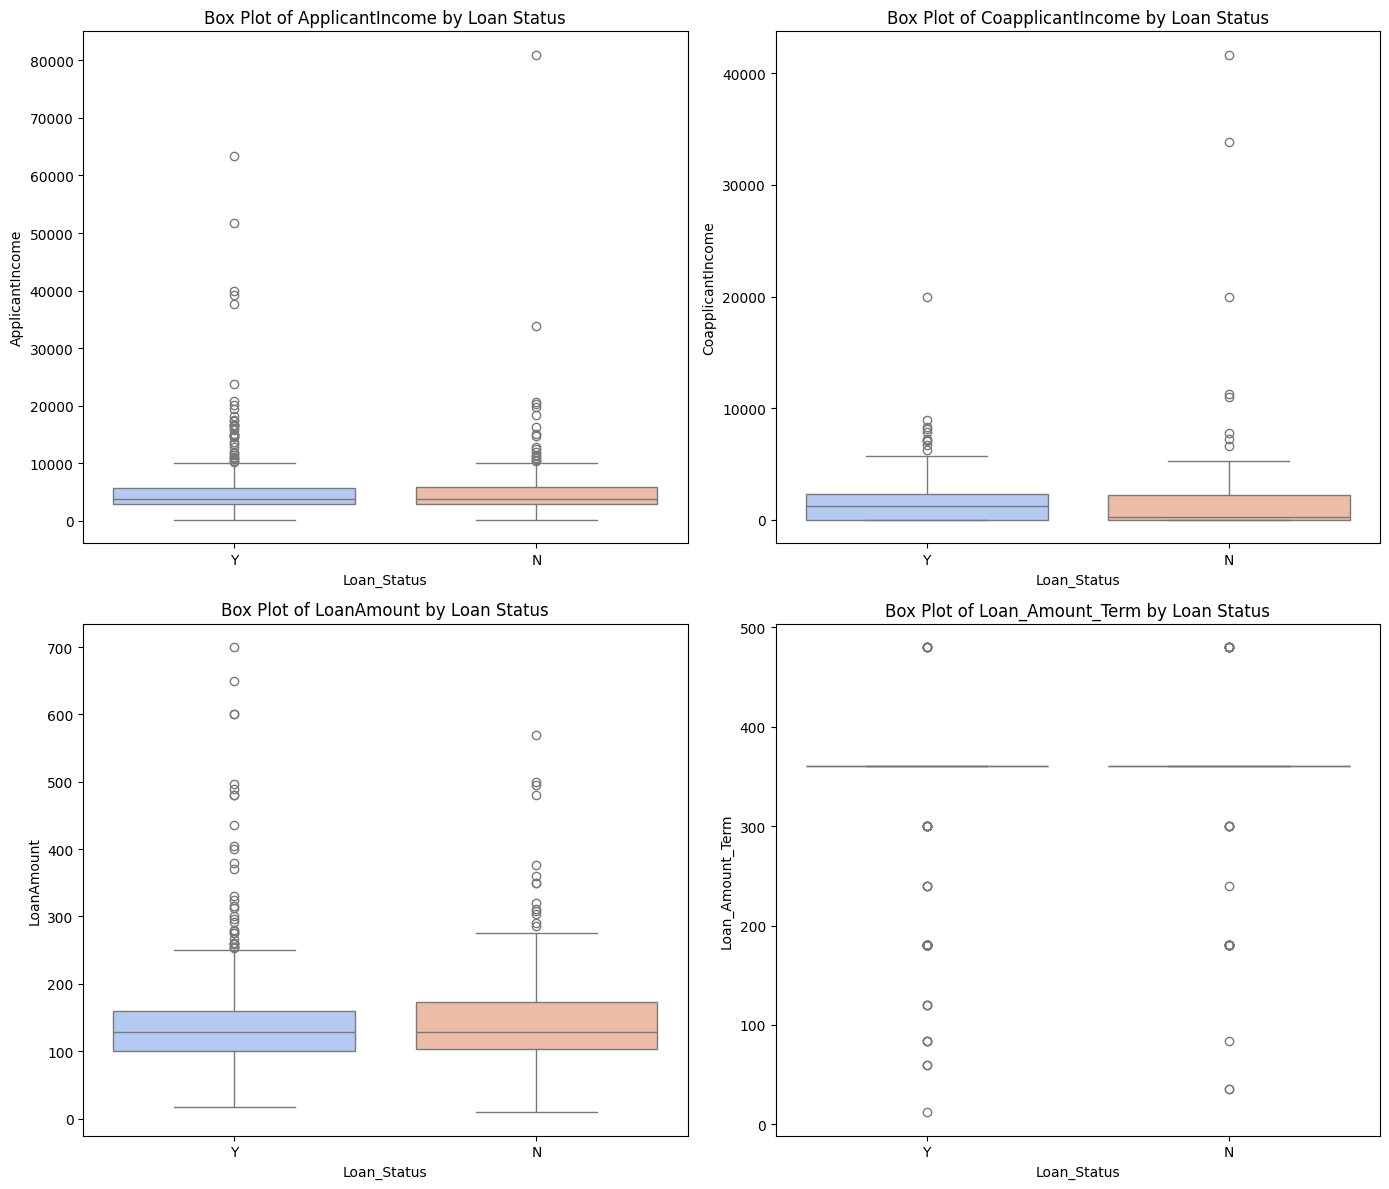

In [21]:
# Plotting Box Plots of numeric columns (to check for outliers)
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + len(num_cols) % 2, 2, i+1)
    sns.boxplot(data=DF, x='Loan_Status', y=col, hue='Loan_Status', palette='coolwarm')
    plt.title(f'Box Plot of {col} by Loan Status')
    plt.tight_layout()

plt.savefig('numerical_boxplots.png')
plt.show()

C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use s

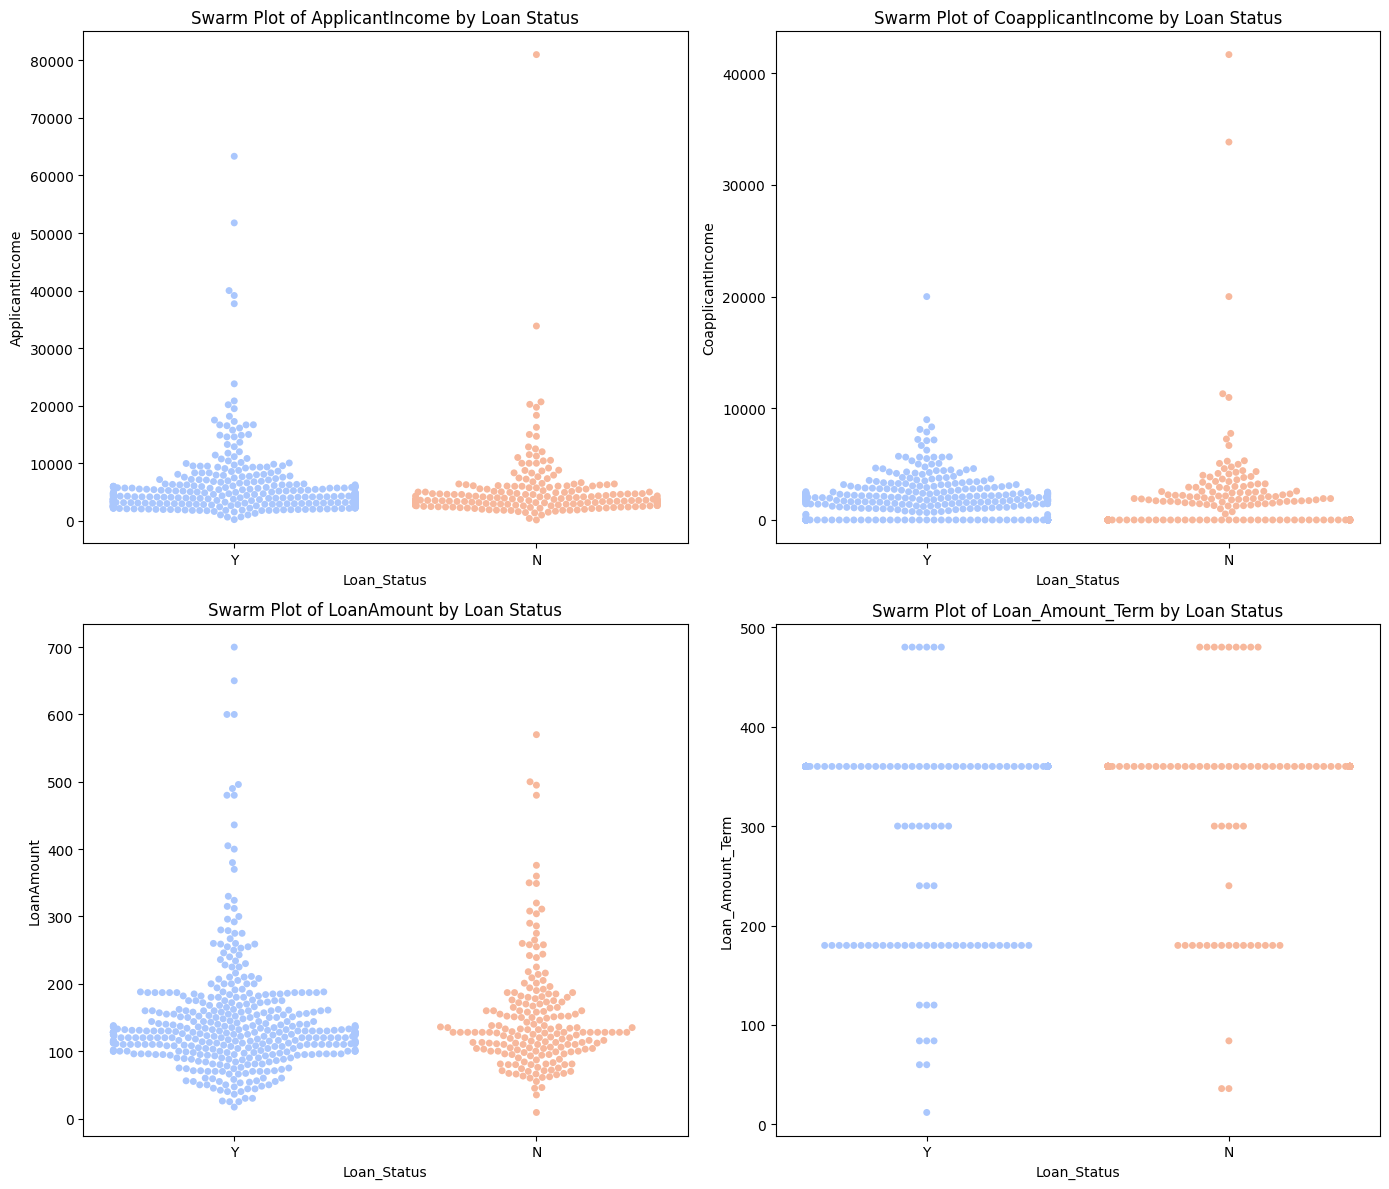

In [22]:
# Plotting Swarm Plots of numeric columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + len(num_cols) % 2, 2, i+1)
    sns.swarmplot(data=DF, x='Loan_Status', y=col, hue='Loan_Status', palette='coolwarm')
    plt.title(f'Swarm Plot of {col} by Loan Status')
    plt.tight_layout()

plt.savefig('numerical_swarmplots.png')
plt.show()

In [23]:
# Encoding of categorical columns.

# Columns to be encoded.
cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Credit_History', 'Property_Area', 'Loan_Status']

le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in cols_to_encode:
    DF[col] = le.fit_transform(DF[col])

# Displaying the first few rows to verify the transformation
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [24]:
# Capping of outliers.
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Getting the first and third quartile of the numeric columns.
Q1 = DF[num_columns].quantile(0.25)
Q3 = DF[num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers.
DF[num_columns] = np.where(DF[num_columns] < lower_bound, lower_bound, DF[num_columns])
DF[num_columns] = np.where(DF[num_columns] > upper_bound, upper_bound, DF[num_columns])

In [25]:
# Standarizing the numeric data.
cols_to_fit = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()
DF[cols_to_fit] = scaler.fit_transform(DF[cols_to_fit])

# Validating by checking first few instances.
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.497164,-0.874587,-0.168041,0.273231,1,2,1
1,1,1,1,0,0,-0.013767,0.054395,-0.168041,0.273231,1,0,0
2,1,1,0,0,1,-0.652632,-0.874587,-1.280462,0.273231,1,2,1
3,1,1,0,1,0,-0.820924,0.578025,-0.311579,0.273231,1,2,1
4,1,0,0,0,0,0.558104,-0.874587,0.065209,0.273231,1,2,1


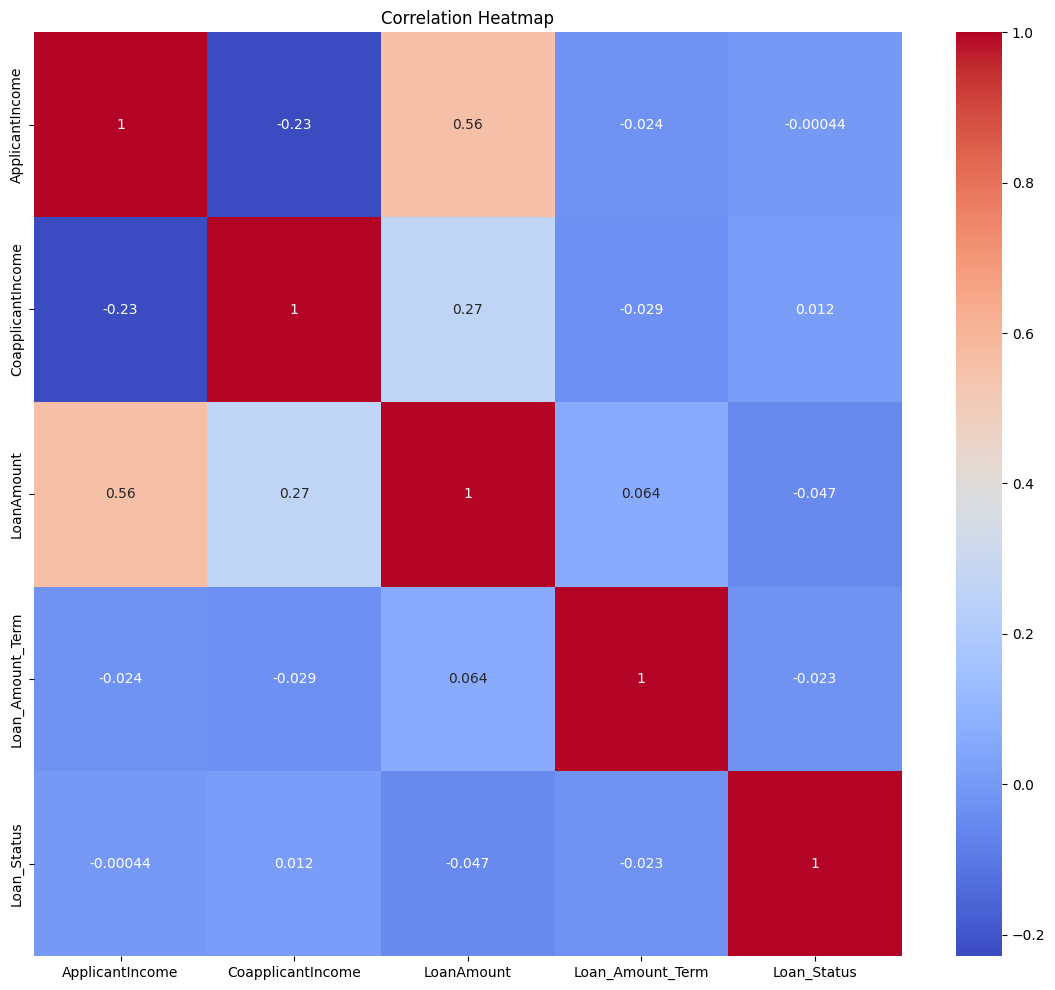

In [26]:
# Pearson Correlation Coefficient Matrix with numeric columns.
target = ["Loan_Status"]
plt.figure(figsize=(14, 12))
sns.heatmap(DF[num_cols + target].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# Splitting the data into training and testing set.
X = DF.drop(columns=["Loan_Status"])
y = DF["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Defining the hyper-parameter grids for each algorithms (except for GNBC)
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 500]
    },
    'LinearSVC': {
        'C': [0.1, 0.5, 1],
    },
    'GaussianNB': {},
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 10]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

In [38]:
# List of models
models = {
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [39]:
"""
Function to fit and predict by using model.
Also saves the performance data in a text file.
"""
train_acc = []
test_acc = []
def build(model, file_path='model_evaluation.txt'):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Prepare results
    results = []
    results.append(f"Training Accuracy: {train_accuracy}")
    results.append(f"Test Accuracy: {test_accuracy}")
    results.append("Classification Report: \n" + classification_report(y_test, y_pred))
    results.append("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred)))
    results.append("\n")

    # Write results to a file
    with open(file_path, 'w') as f:
        for line in results:
            f.write(line + '\n')

In [40]:
"""
For each model it gets the best hyper-parameters.
Then saves them using joblib in a pickel file for deployment purpose.
"""

best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...\n")
    
    # If no params (like GaussianNB), just fit the model directly
    if param_grids[model_name]:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=4, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best params for {model_name}: {best_params}")
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    # Save the best model using joblib
    model_filename = f"{model_name}_best_model.pkl"
    joblib.dump(best_model, model_filename)
    
    build(best_model, f"{model_name}_train_test_result.txt")

Training LogisticRegression...

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best params for LogisticRegression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Training LinearSVC...

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best params for LinearSVC: {'C': 0.1}
Training GaussianNB...

Training DecisionTreeClassifier...

Fitting 4 folds for each of 24 candidates, totalling 96 fits


C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best params for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Training RandomForestClassifier...

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best params for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training AdaBoostClassifier...

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params for AdaBoostClassifier: {'learning_rate': 0.01, 'n_estimators': 50}
Training GradientBoostingClassifier...

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best params for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Training KNeighborsClassifier...

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best params for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
# Saving model names.
models = ['LogisticRegression',
          'LinearSVC',
          'GaussianNB',
          'DecisionTreeClassifier',
          'RandomForestClassifier',
          'AdaBoostClassifier',
          'GradientBoostingClassifier',
          'KNeighborsClassifier']

In [ ]:
# Creating a DataFrame.
acc_df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_acc,
    'Testing Accuracy': test_acc
})

# Saving to CSV file of accuracy data.
acc_df.to_csv('accuracy_comparison.csv', index=False)

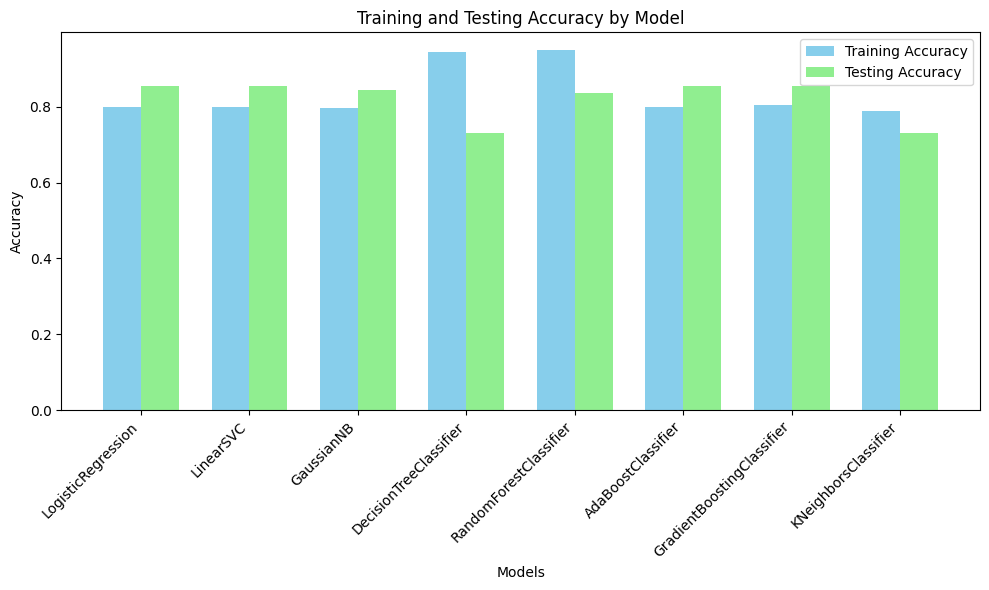

In [41]:
# Comparing the performance of each models training and testing accuracy result.
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bar_train = ax.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue')
bar_test = ax.bar(x + width/2, test_acc, width, label='Testing Accuracy', color='lightgreen')

# Adding labels, title and customizations
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()